In [2]:
import pandas as pd
import numpy as np

In [13]:
# Read SAS file:

df = pd.read_sas("C:\\Users\\User\\Desktop\\FA\\Validation\\ifps2.sas7bdat")  

In [14]:
df.shape

(4902, 3456)

In [15]:
Y_col = [col for col in df if col.startswith('Y6')]
Y_col

[]

In [16]:
# Translating "Due date" to actual date
df['P2'] = pd.to_timedelta(df['P2'], unit='D') + pd.Timestamp('1960-1-1')

In [17]:
df

,SAMPMIQ,TYPPANEL,REGION,STATE,INCOME,HH_SIZE,MARITAL,DWELLING,OWNERSHP,HISPANIC,...,AGE_FLIP,AGE_SAME,AGERETWK,BFEDEVER,BFDURATN,EXBFDURA,HOSPEXBF,LASTAGBF,DHPcompl,DHMcompl
0,b'00000390',1.0,3.0,31.0,32.0,5.0,5.0,5.0,2.0,2.0,...,0.0,NaN,14.9,2.0,0.0,0.00,0.0,NaN,1.0,1.0
1,b'00000639',1.0,5.0,54.0,40.0,3.0,1.0,1.0,1.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,b'00001445',1.0,9.0,92.0,47.0,3.0,1.0,2.0,1.0,1.0,...,0.0,NaN,11.6,1.0,4.0,0.00,0.0,NaN,0.0,0.0
3,b'00002447',1.0,9.0,92.0,47.0,2.0,1.0,2.0,2.0,2.0,...,0.0,NaN,11.6,1.0,25.8,9.50,1.0,NaN,1.0,1.0
4,b'00002866',1.0,8.0,87.0,35.0,3.0,1.0,5.0,2.0,2.0,...,0.0,67.0,NaN,1.0,47.3,20.14,1.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,b'02758256',2.0,7.0,74.0,45.0,6.0,5.0,2.0,1.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4898,b'02761434',2.0,9.0,91.0,43.0,2.0,5.0,3.0,2.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4899,b'02762684',2.0,5.0,58.0,42.0,2.0,NaN,2.0,2.0,2.0,...,0.0,NaN,NaN,2.0,0.0,0.00,0.0,NaN,0.0,0.0
4900,b'02764275',2.0,2.0,22.0,39.0,2.0,NaN,5.0,3.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


### Compute compliance parameters
Sepreate questionnaires by month. if in a questionnaire all are null than compliance parameter=1

In [18]:
Y_col = [col for col in df if col.startswith('Y')]
Y_col

[]

In [19]:
#m3_col = [col for col in df if col.startswith('M3')]
#df['M3_copmliance'] = df[m3_col].isnull().apply(lambda x: all(x), axis=1).astype(int) 
#df['M3_copmliance'].value_counts()

In [20]:
months = ['M2', 'M3', 'M4','M5','M6','M7','M9','MW','MX']

m_cols = []
for i in months:
    m_list = [col for col in df if col.startswith(i)]
    m_cols.append(m_list)
print(m_cols)

[['M2A1A', 'M2A1B', 'M2A1C', 'M2A1D', 'M2A1E', 'M2A1F', 'M2A1G', 'M2A1H', 'M2A1I', 'M2A1J', 'M2A1K', 'M2A1L', 'M2A1M', 'M2A1N', 'M2A1O', 'M2A1P', 'M2A1Q', 'M2A1R', 'M2A1S', 'M2A1SO', 'M2A2A', 'M2A2B', 'M2A2C', 'M2A3A', 'M2A3B', 'M2A3C', 'M2A3D', 'M2A3E', 'M2A4', 'M2A5', 'M2A6A', 'M2A6B', 'M2A6C', 'M2A6D', 'M2A6E', 'M2A6EO', 'M2A6X', 'M2A7', 'M2A8', 'M2A9', 'M2A10_1', 'M2A10_2', 'M2A10_3', 'M2A10_4', 'M2A10_5', 'M2A10_6', 'M2A11A', 'M2A11B', 'M2A11C', 'M2A11D', 'M2A12', 'M2A13', 'M2A14', 'M2A15', 'M2A16', 'M2A17', 'M2A18', 'M2A19', 'M2A20A', 'M2A20B', 'M2A20C', 'M2A20D', 'M2A20E', 'M2A20F', 'M2A20G', 'M2A20H', 'M2A20I', 'M2A20J', 'M2A20K', 'M2A20L', 'M2A20M', 'M2A20N', 'M2A21A', 'M2A21B', 'M2A21C', 'M2A22', 'M2A23O', 'M2A24A', 'M2A24B', 'M2A24C', 'M2A24D', 'M2A24E', 'M2A24F', 'M2A24G', 'M2A24H', 'M2A24I', 'M2A24IO', 'M2A25', 'M2A26_1', 'M2A26_2', 'M2A26_3', 'M2A26_4', 'M2A26_5', 'M2A27', 'M2A28', 'M2A29A', 'M2A29B', 'M2A29C', 'M2A29D', 'M2A29E', 'M2A29F', 'M2A29G', 'M2A29H', 'M2A29I', '

In [21]:
for list in m_cols:
    print(list[0][1])
    

2
3
4
5
6
7
9
W
X


In [22]:
for list in m_cols:
    df[list[0][1]+'_compliance'] = df[list].isnull().apply(lambda x: all(x), axis=1).astype(int) 


In [23]:
df['7_compliance'].value_counts()

1    2882
0    2020
Name: 7_compliance, dtype: int64

### All relevant vairables:

In [24]:
FA_diganosis = ['MWC9','MWC12B_9','MWC12B_8','MWC12B_7','MWC12B_6','MWC12B_5','MWC12B_4','MWC12B_3','MWC12B_2','MWC12B_13','MWC12B_12','MWC12B_11','MWC12B_10','MWC12B_1',
'M9C9','M9C12B_9','M9C12B_8','M9C12B_7','M9C12B_6','M9C12B_5','M9C12B_4','M9C12B_3','M9C12B_2','M9C12B_13','M9C12B_12','M9C12B_11','M9C12B_10','M9C12B_1',
'M4C7','M4C10B_9','M4C10B_8','M4C10B_7','M4C10B_6','M4C10B_5','M4C10B_4','M4C10B_3','M4C10B_2','M4C10B_13','M4C10B_12','M4C10B_11','M4C10B_10','M4C10B_1']

In [25]:
df['FA_diganosis'] = df[FA_diganosis].apply(lambda x: 1 if (x > 0).any() else 0, axis=1)
df['FA_diganosis'].value_counts()

0    4689
1     213
Name: FA_diganosis, dtype: int64

In [26]:
df['FA_diganosis'].value_counts(normalize=True)

0    0.956548
1    0.043452
Name: FA_diganosis, dtype: float64

In [27]:
# All relevant vairables:

X = [
    'SAMPMIQ',
    'RACE', # Race: # 1 = White 2 = Black 3 = Asian 4 = other
    'N1', # Gender # 1 = Male # 2 = Female
    'P2', # Due date
    'DENSITY', # Environment 
    'MWJ3', 'M9J3', 'M6J3', 'M3J3', # number of people in houshold who smoke
    'P10' , 'P11', # number of cigarettes, number of people smoke prenatal
    'P13D1', 'P13D2', 'P13D3', # Mother, Father, sibling eczema
    'M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M', 'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M', #Eczema past 2 weeks by month
    #'M4C8I', 'M9C10I', 'MWC10I', # Skin rash or eczema was symptom
    'P13C3', 'P13E3', # Sibling Asthma, FA
    'P13C1', 'P13E1', 'P13C2', 'P13E2', # Mother Asthma, FA, Father Asthma, FA
    'HH_SIZE', # Household size (= Number of siblings?)
    'AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', # Age of other household member
    'M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A', 'M7A25A', 'M9A28A', 'MWA28A', 'MXA31A', # Baby received antibiotics past 2 weeks by month
    'P41_2', # Adopted
    #'M4C7', 'M9C9', 'MWC9', # Baby diagnosed as having an allergy to food by month 
    'FA_diganosis',
    '2_compliance','3_compliance','4_compliance','5_compliance','6_compliance','7_compliance','9_compliance','X_compliance','W_compliance' #compliance
]

# https://www.cdc.gov/breastfeeding/data/ifps/questionnaires.htm


In [28]:
df = df[X]
df.shape

(4902, 56)

### Computing binary vairable of Urban/Rural
Using the "Density" variable, we included 2 categories of population density: rural or urban. Rural was defined as a nonmetropolitan statistical area (1) or noncentral area of a city smaller than 0.5 million (3), and urban was defined as a central city of any size.

DENSITY
1. Non MSA
2. Central city <0.5 million
3. Non central city <0.5 million
4. Central city 0.5-2 million
5. Non central city 0.5-2 million
6. Central city > 2 million
7. Non central city > 2 million


We included 3 categories of population density: rural, suburban or urban. Rural was defined as a nonmetropolitan statistical
area, suburban was defined as the noncentral area of a
city of any size, and urban was defined as a central city
of any size.

In [29]:
# From population desity to dwelling


rating = []
for row in df['DENSITY']:
    if row == 1:    
      rating.append(1)
    elif row == 2 or row == 4 or row == 6:   # Urban
      rating.append(2)
    else:  
      rating.append(3)
df['dwelling3'] = rating  

df['dwelling3'].value_counts()


3    2374
2    1614
1     914
Name: dwelling3, dtype: int64

In [30]:
# From population desity to dwelling
# We included 2 categories of population density: rural or urban. Rural was defined as a nonmetropolitan statistical area (1) or noncentral area of a
# city smaller than 0.5 million (3), and urban was defined as a central city of any size.


df['dwelling'] = np.where(np.isin(df['DENSITY'], (1,3)),0,1)

df['dwelling'].value_counts()

1    3491
0    1411
Name: dwelling, dtype: int64

In [31]:
df['dwelling'] = np.where(df['dwelling3']==2,1,0)

df['dwelling'].value_counts()

0    3288
1    1614
Name: dwelling, dtype: int64

In [32]:
#df[['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']] = df[['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']].apply(pd.to_numeric)

#df[family_age] = df[family_age].apply(pd.to_numeric)

#df[family_age] = df[family_age].astype(np.float32)

#df['AGE1'].isna()


### Computing the "first born" variable 
Using variables of age of household members and household size 

In [33]:
df['has_siblings'] = df.HH_SIZE.apply(lambda x: 1 if x>3 else 0)

df[['has_siblings','HH_SIZE']]

,has_siblings,HH_SIZE
0,1,5.0
1,0,3.0
2,0,3.0
3,0,2.0
4,0,3.0
...,...,...
4897,1,6.0
4898,0,2.0
4899,0,2.0
4900,0,2.0


In [34]:
#df['sibling1'] = np.where(df['AGE1'].isna(), 0, df['siblings'])
#df['sibling6'] = np.where(df['AGE6'].isna(), 0, df['siblings'])
# df[col].isna() and 

family_age = ['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']   


for col in family_age :
    #df[col] = df[col].astype('Int64')
    df['sibling_'+col] = np.where(df[col]<=18, 1, 0)
    #df['siblings'] = df['sibling_'+col].sum()

df['siblings'] = df['sibling_AGE1'] + df['sibling_AGE2'] + df['sibling_AGE3'] + df['sibling_AGE4'] + df['sibling_AGE5'] + df['sibling_AGE6']



In [35]:
df['siblings'].value_counts()


1    1799
0    1529
2     974
3     395
4     132
5      48
6      25
Name: siblings, dtype: int64

In [36]:
df[['has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].head(15)

,has_siblings,HH_SIZE,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,sibling_AGE1,sibling_AGE2,sibling_AGE3,sibling_AGE4,sibling_AGE5,sibling_AGE6,siblings
0,1,5.0,18.0,12.0,5.0,3.0,NaN,NaN,1,1,1,1,0,0,4
1,0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
2,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
3,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
5,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
6,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
7,0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
8,1,7.0,16.0,14.0,8.0,5.0,3.0,NaN,1,1,1,1,1,0,5
9,1,5.0,10.0,5.0,23.0,NaN,NaN,NaN,1,1,0,0,0,0,2


In [37]:
df['first_born'] = df[['siblings','has_siblings']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)

df['first_born'].value_counts()

0    3516
1    1386
Name: first_born, dtype: int64

In [38]:
df[['first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].sample(15)

,first_born,has_siblings,HH_SIZE,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,sibling_AGE1,sibling_AGE2,sibling_AGE3,sibling_AGE4,sibling_AGE5,sibling_AGE6,siblings
278,1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3112,0,0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
2636,1,0,2.0,25.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
270,0,1,4.0,5.0,3.0,NaN,NaN,NaN,NaN,1,1,0,0,0,0,2
2619,1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1489,0,1,4.0,4.0,1.0,NaN,NaN,NaN,NaN,1,1,0,0,0,0,2
396,0,0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
3857,0,0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
3311,1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4030,1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


### Family atopic history

In [39]:
Maternal_atopic = ['P13D1','P13C1','P13E1']

df[Maternal_atopic]

,P13D1,P13C1,P13E1
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
4897,0.0,0.0,0.0
4898,0.0,1.0,NaN
4899,0.0,0.0,0.0
4900,0.0,0.0,0.0


In [40]:
Maternal_atopic = ['P13D1','P13C1','P13E1']

df['Maternal_atopic'] = df[['P13D1','P13C1','P13E1']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)

df['Maternal_atopic'].value_counts()

1    3778
0    1124
Name: Maternal_atopic, dtype: int64

In [41]:
#df['Maternal_atopic'] = df[['P13D1','P13C1','P13E1']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)
df['Maternal_atopic'] = df['P13D1'] + df['P13C1'] + df['P13E1']
df['Maternal_atopic'].value_counts()

0.0    3052
1.0     670
2.0     148
3.0      25
Name: Maternal_atopic, dtype: int64

In [42]:
df['Paternal_atopic'] = df['P13D2'] + df['P13C2'] + df['P13E2']
df['Paternal_atopic'].value_counts()

0.0    3363
1.0     452
2.0      67
3.0      13
Name: Paternal_atopic, dtype: int64

In [43]:
df['Parental_atopic'] = df['Maternal_atopic'] + df['Paternal_atopic']
df['Parental_atopic'].value_counts()

0.0    2694
1.0     853
2.0     254
3.0      79
4.0       9
5.0       4
6.0       2
Name: Parental_atopic, dtype: int64

In [44]:
df['Sibling_atopic'] = df['P13D3'] + df['P13C3'] + df['P13E3']
df['Sibling_atopic'].value_counts()

0.0    3230
1.0     487
2.0     138
3.0      40
Name: Sibling_atopic, dtype: int64

In [45]:
#df[['Sibling_atopic','first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].sample(15)
#df[df['Sibling_atopic']>df['siblings']][['Sibling_atopic','siblings','first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6']].sample(15)

In [46]:
df['prec_sibling'] = df['Sibling_atopic'] / df['siblings']
df['prec_sibling'] = df['prec_sibling'].fillna(0)
df['prec_sibling'] = np.where(df['Sibling_atopic']>df['siblings'],1,df['prec_sibling'])

In [47]:
df['first_born'] = df[['siblings','has_siblings','Sibling_atopic']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)

df['first_born'].value_counts()

0    3560
1    1342
Name: first_born, dtype: int64

In [48]:
df[['Sibling_atopic','siblings','prec_sibling']].sample(10)

,Sibling_atopic,siblings,prec_sibling
550,0.0,1,0.0
432,NaN,0,0.0
2244,1.0,1,1.0
3,0.0,0,0.0
4328,0.0,0,0.0
2107,1.0,1,1.0
1603,0.0,1,0.0
1699,0.0,1,0.0
573,NaN,1,0.0
2739,0.0,0,0.0


<AxesSubplot:>

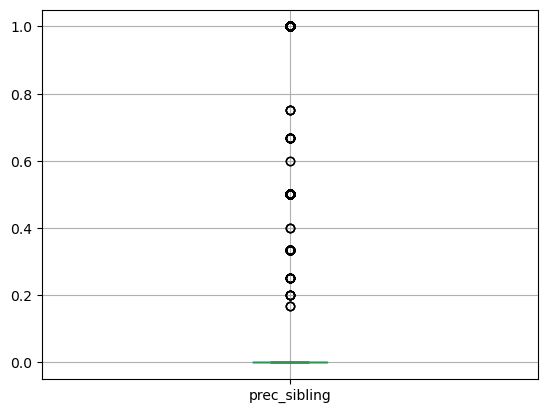

In [49]:

boxplot = df.boxplot(column=['prec_sibling'])
boxplot


In [50]:
df[['Sibling_atopic','P13D3','P13C3','P13E3','siblings','has_siblings','first_born']].sample(20)

,Sibling_atopic,P13D3,P13C3,P13E3,siblings,has_siblings,first_born
2557,0.0,0.0,0.0,0.0,2,1,0
3307,0.0,0.0,0.0,0.0,0,0,1
1601,1.0,1.0,0.0,0.0,1,0,0
4485,NaN,NaN,1.0,NaN,2,1,0
2158,NaN,0.0,NaN,0.0,1,0,0
409,0.0,0.0,0.0,0.0,0,0,1
2649,0.0,0.0,0.0,0.0,1,1,0
4027,0.0,0.0,0.0,0.0,1,0,0
3943,0.0,0.0,0.0,0.0,1,0,0
237,1.0,1.0,0.0,0.0,1,0,0


### Smoking
Considering all smoking variable to one - "Smoking in houshold"

In [51]:
 # number of people in houshold who smoke
 # number of cigarettes, number of people smoke prenatal


 df[['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11']].sum() 

MWJ3     240.0
M9J3     255.0
M6J3     282.0
M3J3     325.0
P10     5516.0
P11     1313.0
dtype: float64

In [52]:
smokers = ['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11']

df['Smoking'] = df[smokers].apply(lambda x: 1 if x.any()>0 else 0, axis=1)

In [53]:
df['Smoking'].value_counts()

0    3692
1    1210
Name: Smoking, dtype: int64

In [54]:
#df[df['P10']>0,'P10']
 #.sum()

df[['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11','Smoking']].sample(20)

,MWJ3,M9J3,M6J3,M3J3,P10,P11,Smoking
2710,NaN,NaN,NaN,NaN,4.0,1.0,1
2347,0.0,0.0,NaN,0.0,0.0,0.0,0
906,NaN,NaN,NaN,NaN,10.0,1.0,1
442,0.0,0.0,0.0,0.0,0.0,0.0,0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0
2429,NaN,NaN,NaN,0.0,0.0,0.0,0
2342,NaN,NaN,NaN,NaN,0.0,0.0,0
1720,NaN,NaN,NaN,NaN,0.0,0.0,0
2485,NaN,NaN,NaN,NaN,0.0,0.0,0
3110,NaN,NaN,NaN,NaN,0.0,0.0,0


### Diagnosis
AD past 2 weeks

In [55]:
AD = ['M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M', 'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M']

df['AD_diagnosis'] = df[AD].apply(lambda x: 1 if x.any()>0 else 0, axis=1)

df['AD_diagnosis'].value_counts(normalize=True)

0    0.894125
1    0.105875
Name: AD_diagnosis, dtype: float64

### Antibiotics
Antibiotics perscribed during the first 6m\
Answered the question : Baby received antibiotics past 2 weeks\
from 2m to 6m

In [56]:
antibiotics = ['M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A'] #Antibiotics in the first 6 months

df['Infant_Antibiotics'] = df[antibiotics].eq(1).any(axis=1).astype(int)

df['Infant_Antibiotics'].value_counts(normalize=False)

0    4330
1     572
Name: Infant_Antibiotics, dtype: int64

In [57]:
df['Infant_Antibiotics'].value_counts(normalize=True)

0    0.883313
1    0.116687
Name: Infant_Antibiotics, dtype: float64

In [58]:
df[['M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A','Infant_Antibiotics']].sample(10)

,M2A21A,M3A21A,M4A23A,M5A26A,M6A25A,Infant_Antibiotics
1675,NaN,NaN,NaN,NaN,NaN,0
2960,NaN,NaN,NaN,NaN,NaN,0
3460,NaN,NaN,NaN,NaN,NaN,0
1314,NaN,NaN,2.0,NaN,NaN,0
338,2.0,2.0,2.0,2.0,1.0,1
4378,NaN,NaN,NaN,NaN,NaN,0
2113,NaN,NaN,NaN,NaN,NaN,0
99,NaN,NaN,NaN,NaN,NaN,0
2583,2.0,2.0,2.0,2.0,2.0,0
1114,2.0,2.0,NaN,1.0,1.0,1


## The table with the new variables
To match FA algorithm (for validation)

In [59]:
# from due date to season

df['due_month'] = pd.DatetimeIndex(df['P2']).month

df.due_month

#df.loc[df.due_month.isin([9,10,11])]

0       10.0
1       12.0
2        2.0
3        7.0
4        1.0
        ... 
4897     3.0
4898     3.0
4899     2.0
4900     4.0
4901     3.0
Name: due_month, Length: 4902, dtype: float64

In [60]:
def season (row):
    autumn = np.array([9,10,11])
    summer = np.array([6,7,8])
    winter = np.array([12,1,2])
    spring = np.array([3,4,5])
    res = []
    if row in (autumn) :
        res = "Autumn"
    if row in (summer) :
        res = "Summer"
    if row in(winter) : 
        res = "Winter"
    if row in(spring) : 
        res = "Spring"    
    return res

df['Season'] = df.due_month.apply(lambda x: season(x))

#df['Season'] = season(df.loc[], 'due_month')

#test_sea = df.loc[3,'due_month']
#print (test_sea)
#print(season(test_sea))

df['Season'].value_counts()


Winter    1905
Autumn    1756
Summer     981
Spring     223
[]          37
Name: Season, dtype: int64

In [61]:
#df['Season']

df[df['Season'].isna()]

,SAMPMIQ,RACE,N1,P2,DENSITY,MWJ3,M9J3,M6J3,M3J3,P10,...,Maternal_atopic,Paternal_atopic,Parental_atopic,Sibling_atopic,prec_sibling,Smoking,AD_diagnosis,Infant_Antibiotics,due_month,Season


In [62]:
#df_season = pd.get_dummies(df["Season"])

df_season = pd.get_dummies(df.Season.apply(pd.Series).stack()).sum(level=0)


df = pd.concat((df_season, df), axis=1)

In [63]:
df['Gender'] = np.where(df['N1']==1,1,0)
print(df['Gender'].value_counts())
print(df['N1'].value_counts())

0    3401
1    1501
Name: Gender, dtype: int64
2.0    1529
1.0    1501
Name: N1, dtype: int64


In [64]:
df.columns

Index(['Autumn', 'Spring', 'Summer', 'Winter', 'SAMPMIQ', 'RACE', 'N1', 'P2',
       'DENSITY', 'MWJ3', 'M9J3', 'M6J3', 'M3J3', 'P10', 'P11', 'P13D1',
       'P13D2', 'P13D3', 'M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M',
       'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M', 'P13C3', 'P13E3', 'P13C1',
       'P13E1', 'P13C2', 'P13E2', 'HH_SIZE', 'AGE1', 'AGE2', 'AGE3', 'AGE4',
       'AGE5', 'AGE6', 'M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A',
       'M7A25A', 'M9A28A', 'MWA28A', 'MXA31A', 'P41_2', 'FA_diganosis',
       '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance', 'dwelling3', 'dwelling', 'has_siblings', 'sibling_AGE1',
       'sibling_AGE2', 'sibling_AGE3', 'sibling_AGE4', 'sibling_AGE5',
       'sibling_AGE6', 'siblings', 'first_born', 'Maternal_atopic',
       'Paternal_atopic', 'Parental_atopic', 'Sibling_atopic', 'prec_sibling',
       'Smoking', 'AD_diagnosis', 'Inf

In [65]:
df.loc[(df['4_compliance']==0) & (df['9_compliance']==0) & 
       (df['W_compliance']==0)][['2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance']].sum()


2_compliance     55
3_compliance     76
4_compliance      0
5_compliance     59
6_compliance     66
7_compliance     71
9_compliance      0
X_compliance    127
W_compliance      0
dtype: int64

In [66]:
# Full var

df_pred = df[['SAMPMIQ','dwelling','N1','Gender', 'Autumn', 'Spring', 'Summer', 'Winter', #'P2', #'RACE',
    'FA_diganosis','AD_diagnosis','Infant_Antibiotics','Smoking',
    'first_born','P13E3','prec_sibling','Parental_atopic',
     '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance',
     'P41_2','RACE']]
   # 'Maternal_atopic','Paternat_atopic']]

df_pred

,SAMPMIQ,dwelling,N1,Gender,Autumn,Spring,Summer,Winter,FA_diganosis,AD_diagnosis,...,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,2.0
1,b'00000639',0,NaN,0,0.0,0.0,0.0,1.0,0,0,...,1,1,1,1,1,1,1,1,0.0,2.0
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0.0,4.0
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,b'02512015',1,NaN,0,NaN,NaN,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,0.0,1.0
4287,b'02525342',0,NaN,0,NaN,NaN,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,0.0,1.0
4411,b'02561537',0,NaN,0,NaN,NaN,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,0.0,1.0
4660,b'02643578',0,NaN,0,NaN,NaN,NaN,NaN,0,0,...,1,1,1,1,1,1,1,1,0.0,1.0


## Exclusion criteria
1. Compliance - Removing patients who did not finish 12m questionnaire, n=3095 \
(sample of 4902 pregnant women began the study, and ∼2000 continued through their infant's first year.) (n=1807)
2. Removing patients without gender (n=2)
3. Removing adoped children (n=43) \
\
Total population: N=1764 \
n_FA=610 (9%) \
n_Control=1604 

In [67]:
df_pred.shape

(4902, 27)

In [68]:
# Compliance
#df_pred = df_pred[df_pred['W_compliance']==0]
df_pred = df_pred[(df['4_compliance']==0) & (df['9_compliance']==0) & (df['W_compliance']==0)] # The months where they were asked about FA diagnosis
df_pred.shape

(1505, 27)

In [69]:
# Gender
df_pred = df_pred[df_pred.N1.notna()]
df_pred.shape

(1504, 27)

In [70]:
# Only non adopted children
df_pred = df_pred[df_pred['P41_2']==0]
df_pred.shape

(1477, 27)

In [71]:
#df_pred = df_pred[df_pred['RACE']==1]
#df_pred.shape

In [72]:
print(df_pred.FA_diganosis.value_counts(normalize=False))
print(df_pred.FA_diganosis.value_counts(normalize=True))

0    1332
1     145
Name: FA_diganosis, dtype: int64
0    0.901828
1    0.098172
Name: FA_diganosis, dtype: float64


In [73]:
df_pred = df_pred.fillna(0)
df_pred

,SAMPMIQ,dwelling,N1,Gender,Autumn,Spring,Summer,Winter,FA_diganosis,AD_diagnosis,...,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,2.0
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0.0,4.0
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
5,b'00004026',0,1.0,1,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,b'02721732',0,1.0,1,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
4875,b'02738322',0,2.0,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
4881,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
4895,b'02757061',1,1.0,1,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0


# Algorithm Validation

In [3]:
import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_1YO_no_a.sav', 'rb')
meta = pickle.load(file)

# AUC=77, Presicion=9, Recall=58, Accuracy=79 (TH=0.12) 

In [75]:
meta.feature_names_in_

array(['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter'], dtype=object)

In [76]:
meta.get_config()

AttributeError: 'RandomForestRegressor' object has no attribute 'get_config'

In [77]:
df_pred = df_pred.rename(columns={'FA_diganosis':'Target',
                        'Gender':'Gender',
                        'dwelling':'Urban',
                        'Smoking':'Smoking',
                        'Parental_atopic':'Parent Atopic Condition',
                        #'ANTBTPRGNC':'Systemic Antibiotics During Pregnancy',
                        'first_born' : 'First Born',
                        'P13E3':'Sibling Food Allergies',
                        'prec_sibling':'Percent of Siblings with Atopic',
                        'AD_diagnosis' : 'Infant Atopic Dermatitis',
                        'Infant_Antibiotics' : 'Infant Systemic Antibiotics',
                        'Autumn':'Season of birth: Autumn',
                        'Summer':'Season of birth: Summer',
                        'Winter':'Season of birth: Winter',
                        'Spring':'Season of birth: Spring'
                        })

In [78]:
df_pred1 = df_pred[['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter','Target']]

In [79]:
df_pred1

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,Target
0,0,0,1,2.0,0,0.0,0.5,0,1,1.0,0.0,0.0,0
2,0,1,0,0.0,0,1.0,1.0,0,0,0.0,0.0,1.0,1
3,1,0,0,2.0,1,0.0,0.0,0,0,0.0,1.0,0.0,0
4,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0
5,1,0,0,1.0,1,0.0,0.0,0,0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,1,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0
4875,0,0,1,0.0,0,0.0,0.5,0,0,0.0,0.0,1.0,0
4881,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
4895,1,1,0,0.0,0,0.0,0.0,0,1,0.0,0.0,1.0,0


In [80]:
feature_cols = ['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter']
X = df_pred1[feature_cols] # Features
y = df_pred1['Target']

In [4]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [82]:
y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[999 333]
 [ 77  68]]
Accuracy: 0.7224102911306702
Precision: 0.16957605985037408
Recall: 0.4689655172413793
roc_auc_score: 0.6455602153878016


In [90]:
y_pred = meta.predict(X)
auc_1yc_val = pd.DataFrame(np.column_stack([y_pred,y]), columns=['y1c_pred', 'y1c_val'])
auc_1yc_val

,y1c_pred,y1c_val
0,0.265326,0.0
1,0.161123,1.0
2,0.118034,0.0
3,0.061738,0.0
4,0.101877,0.0
...,...,...
1472,0.065767,0.0
1473,0.078047,0.0
1474,0.062230,0.0
1475,0.234262,0.0


In [91]:
# Save to csv:
df_pred1.to_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_1Y.csv") # 1Y questionnaire data frame
auc_1yc_val.to_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\auc\\auc_1Yc_val.csv") # for auc validation analysis

In [989]:
# AUC=77, Presicion=9, Recall=58, Accuracy=79 (TH=0.12) 

In [1196]:
# Results table
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    cm = confusion_matrix(y, labels)
    FP = cm[0][1]
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    scores.append([n,FP,TN,TP,FN])
    result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result


,TH,FP,TN,TP,FN
0,0.10,716,616,106,39
1,0.15,545,787,90,55
2,0.20,437,895,81,64
3,0.25,342,990,69,76
4,0.30,285,1047,58,87
5,0.40,160,1172,34,111
6,0.50,71,1261,19,126


In [1203]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    prob = meta.predict(X)
    report = classification_report(y, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
    auc_score = roc_auc_score(y, meta.predict(X))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.128954,0.731034,0.488829,0.219235,0.640346,0.029838
1,0.15,0.141732,0.620690,0.593771,0.230769,0.640346,0.029838
2,0.20,0.156371,0.558621,0.660799,0.244344,0.640346,0.029838
3,0.25,0.167883,0.475862,0.716994,0.248201,0.640346,0.029838
4,0.30,0.169096,0.400000,0.748138,0.237705,0.640346,0.029838
5,0.40,0.175258,0.234483,0.816520,0.200590,0.640346,0.029838
6,0.50,0.211111,0.131034,0.866622,0.161702,0.640346,0.029838


In [1153]:
y_pred = meta.predict(X)
y_pred

array([0.29823392, 0.16112253, 0.11803439, ..., 0.06223022, 0.23426196,
       0.06173795])

In [1154]:
df_pred['y_pred'] = y_pred.tolist()
df_pred

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,Target,y_pred
0,0,1,1,2.0,0,0.0,0.5,0,1,1.0,0.0,0.0,0,0.298234
2,0,1,0,0.0,0,1.0,1.0,0,0,0.0,0.0,1.0,1,0.161123
3,1,0,0,2.0,1,0.0,0.0,0,0,0.0,1.0,0.0,0,0.118034
4,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0,0.061738
5,1,1,0,1.0,1,0.0,0.0,0,0,1.0,0.0,0.0,0,0.134993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,1,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0,0.065767
4875,0,0,1,0.0,0,0.0,0.5,0,0,0.0,0.0,1.0,0,0.078047
4881,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.062230
4895,1,1,0,0.0,0,0.0,0.0,0,1,0.0,0.0,1.0,0,0.234262


In [1155]:
df_pred[df_pred['y_pred']>0.2].Target.value_counts(normalize=True)

0    0.843629
1    0.156371
Name: Target, dtype: float64

In [1156]:
df_pred[df_pred['y_pred']<=0.2].Target.value_counts(normalize=True)

0    0.933264
1    0.066736
Name: Target, dtype: float64

<Figure size 640x480 with 0 Axes>

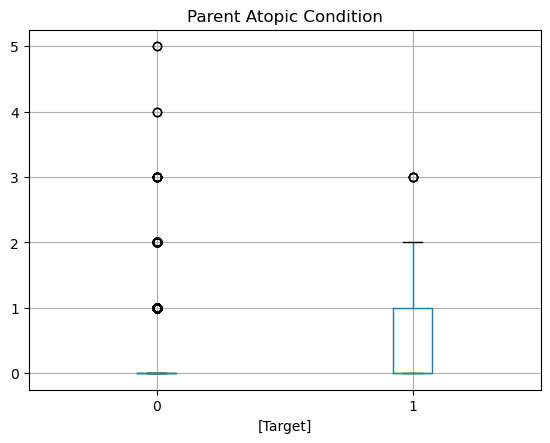

In [1157]:
import matplotlib.pyplot as plt

df_pred.boxplot(column=['Parent Atopic Condition'], by=['Target'])
plt.title("Parent Atopic Condition")
plt.suptitle("")
plt.show()


In [1158]:
df_pred[df_pred['Parent Atopic Condition']>3]

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,Target,y_pred
424,1,1,0,4.0,0,1.0,1.0,0,0,1.0,0.0,0.0,0,0.279528
1326,0,0,0,5.0,0,1.0,1.0,0,0,0.0,0.0,1.0,0,0.291863
4629,0,1,0,4.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0,0.131047
4650,1,0,0,5.0,0,0.0,1.0,1,1,0.0,0.0,1.0,0,0.594954


In [1160]:
df[df.index==424][['2_compliance', '3_compliance', '4_compliance', '5_compliance','6_compliance', '7_compliance', '9_compliance', 'X_compliance', 'W_compliance']]

,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance
424,0,0,0,0,0,0,0,0,0


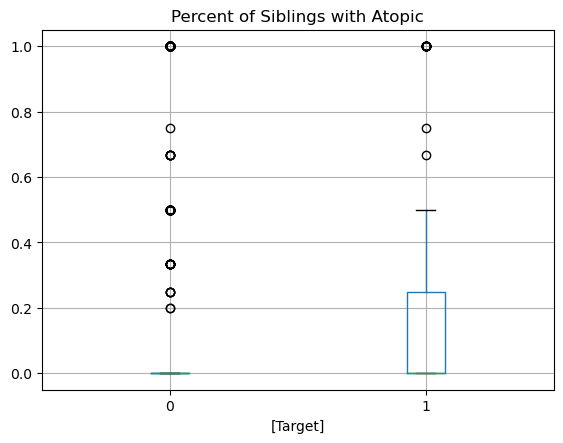

In [1161]:
df_pred.boxplot(column=['Percent of Siblings with Atopic'], by=['Target'])
plt.title("Percent of Siblings with Atopic")
plt.suptitle("")
plt.show()


In [1162]:
df_pred[(df_pred['Percent of Siblings with Atopic']==1) & (df_pred['Target']==0)].mean()

Gender                             0.510870
Urban                              0.760870
Smoking                            0.173913
Parent Atopic Condition            0.869565
First Born                         0.000000
Sibling Food Allergies             0.380435
Percent of Siblings with Atopic    1.000000
Infant Atopic Dermatitis           0.347826
Infant Systemic Antibiotics        0.239130
Season of birth: Autumn            0.304348
Season of birth: Summer            0.304348
Season of birth: Winter            0.369565
Target                             0.000000
y_pred                             0.315942
dtype: float64

In [1163]:
df_pred[(df_pred['Percent of Siblings with Atopic']==1) & (df_pred['Target']==1)].mean()

Gender                             0.333333
Urban                              0.666667
Smoking                            0.238095
Parent Atopic Condition            0.904762
First Born                         0.000000
Sibling Food Allergies             0.714286
Percent of Siblings with Atopic    1.000000
Infant Atopic Dermatitis           0.333333
Infant Systemic Antibiotics        0.333333
Season of birth: Autumn            0.142857
Season of birth: Summer            0.476190
Season of birth: Winter            0.333333
Target                             1.000000
y_pred                             0.365258
dtype: float64

In [1164]:
df_pred.groupby(by=["Target"]).mean()

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,y_pred
Target,,,,,,,,,,,,,
0,0.480480,0.707207,0.174925,0.327327,0.271772,0.039039,0.093581,0.201952,0.225976,0.364865,0.234985,0.388889,0.186871
1,0.517241,0.689655,0.220690,0.400000,0.262069,0.158621,0.197701,0.400000,0.262069,0.365517,0.213793,0.386207,0.273360


In [1165]:
df_pred.groupby(by=["Target"]).std()

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,y_pred
Target,,,,,,,,,,,,,
0,0.499806,0.455215,0.380046,0.666514,0.445040,0.193761,0.268998,0.401607,0.418381,0.481573,0.424149,0.487681,0.163862
1,0.501435,0.464238,0.416149,0.730297,0.441284,0.366588,0.364427,0.491596,0.441284,0.483244,0.411404,0.488567,0.198770


## 6 Year Follow up

In [9]:
# Read 6Y follow up file:

df_6y = pd.read_sas("C:\\Users\\User\\Downloads\\Y6FU.sas7bdat")  

In [10]:
df_6y

,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,...,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag
0,390.0,1.0,3.0,3.0,2.0,1.0,1.0,6.0,2.0,10.0,...,NaN,0.0,NaN,NaN,-2.048252,0.0,1.807252,0.0,2.662279,0.0
1,1445.0,1.0,4.0,7.0,4.0,4.0,14.0,3.0,4.0,7.0,...,2.141717,0.0,0.0,0.0,0.491242,0.0,1.943112,0.0,2.145897,0.0
2,2447.0,1.0,1.0,5.0,1.0,1.0,18.0,4.0,1.0,3.0,...,2.335317,0.0,0.0,0.0,0.185639,0.0,2.355015,0.0,2.672048,0.0
3,2866.0,1.0,1.0,5.0,1.0,1.0,18.0,7.0,6.0,10.0,...,-1.668476,0.0,0.0,0.0,-0.350277,0.0,-0.859937,0.0,-0.872744,0.0
4,12331.0,1.0,1.0,7.0,1.0,1.0,18.0,5.0,4.0,9.0,...,1.239264,0.0,0.0,0.0,-0.111786,0.0,1.065077,0.0,1.515615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2726524.0,1.0,1.0,5.0,1.0,1.0,19.0,3.0,6.0,10.0,...,0.178786,0.0,0.0,0.0,-0.855618,0.0,-0.254479,0.0,0.550687,0.0
1538,2744682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.938027,0.0,0.0,0.0,1.718793,0.0,0.678431,0.0,-0.413940,0.0
1539,2747579.0,1.0,1.0,5.0,1.0,1.0,17.0,5.0,6.0,10.0,...,0.141544,0.0,0.0,0.0,-1.231215,0.0,-0.395789,0.0,0.560994,0.0
1540,2754203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.612264,0.0,0.0,0.0,1.138904,0.0,0.282378,0.0,-0.609766,0.0


In [68]:
df_6y.columns

Index(['Y6origmiq', 'Y6gend', 'Y6marital', 'Y6educ', 'Y6race', 'Y6hisp',
       'Y6income', 'Y6hhsiz', 'Y6employ', 'Y6occ',
       ...
       'y6_bmiz1', 'Y6_waz1_flag', 'Y6_haz1_flag', 'Y6_bmiz1_flag', 'y6_haz2',
       'Y6_haz2_flag', 'y6_waz2', 'Y6_waz2_flag', 'y6_bmiz2', 'Y6_bmiz2_flag'],
      dtype='object', length=454)

#### Food allergy diagnosis questions:

Y6b27a. Diagnosed food allergy in the last 12 m \
Y6b27b. Diagnosed food allergy > 12 m ago \
\
.N: No Answer
.S: Skipped
0: Not Marked
1: Marked

In [1209]:
print(df_6y.Y6b27a.value_counts())
print(df_6y.Y6b27b.value_counts())

0.0    129
1.0     23
Name: Y6b27a, dtype: int64
1.0    79
0.0    73
Name: Y6b27b, dtype: int64


In [1218]:
# FA up yo 5Y
df_5y = df_6y[df_6y.Y6b27b==1]
df_5y.shape

(79, 454)

In [1229]:
# Y6origmiq
#df_5y[df_5y.Y6origmiq == 2758256]
df_5y

,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,...,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag
1,1445.0,1.0,4.0,7.0,4.0,4.0,14.0,3.0,4.0,7.0,...,2.141717,0.0,0.0,0.0,0.491242,0.0,1.943112,0.0,2.145897,0.0
19,35796.0,1.0,1.0,7.0,1.0,1.0,21.0,4.0,1.0,1.0,...,-0.465320,0.0,0.0,0.0,-0.845484,0.0,-0.236562,0.0,0.477114,0.0
71,177414.0,1.0,1.0,7.0,1.0,1.0,22.0,5.0,1.0,1.0,...,-2.152265,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
164,407536.0,1.0,1.0,6.0,1.0,5.0,14.0,3.0,3.0,4.0,...,-0.143506,0.0,0.0,0.0,0.036372,0.0,-0.406710,0.0,-0.636462,0.0
169,419357.0,1.0,1.0,7.0,2.0,1.0,17.0,4.0,1.0,3.0,...,-0.662452,0.0,0.0,0.0,-1.855274,0.0,-0.701799,0.0,0.899913,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2600252.0,1.0,1.0,7.0,1.0,1.0,19.0,4.0,6.0,10.0,...,-0.121842,0.0,0.0,0.0,1.138904,0.0,0.555585,0.0,-0.077339,0.0
1478,2615879.0,1.0,1.0,7.0,NaN,1.0,18.0,4.0,6.0,10.0,...,-1.407714,0.0,0.0,0.0,NaN,NaN,-1.339680,0.0,NaN,NaN
1512,2655373.0,1.0,6.0,5.0,1.0,1.0,12.0,5.0,1.0,5.0,...,3.258259,1.0,0.0,1.0,-0.743098,0.0,3.507436,1.0,3.267303,1.0
1520,2685113.0,1.0,1.0,5.0,1.0,1.0,18.0,6.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1364]:
#df[df['SAMPMIQ']=="b'00001445'"]
#df
df_pred['SAMPMIQ'] = df_pred['SAMPMIQ'].astype(str)
#df['Y6origmiq'] = df['SAMPMIQ'].str.split("b")
df_pred['Y6origmiq'] = df_pred['SAMPMIQ'].apply(lambda x: x.split("b")[1])
df_pred['Y6origmiq'] = df_pred['Y6origmiq'].apply(lambda x: x.split("'")[1]).astype(int)
df_pred

,SAMPMIQ,dwelling,N1,Gender,Autumn,Spring,Summer,Winter,FA_diganosis,AD_diagnosis,...,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Y6origmiq
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,2.0,390
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0.0,4.0,1445
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2447
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2866
5,b'00004026',0,1.0,1,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,4026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,b'02721732',0,1.0,1,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2721732
4875,b'02738322',0,2.0,0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2738322
4881,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2744682
4895,b'02757061',1,1.0,1,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,2757061


In [1294]:
test = df['SAMPMIQ'].iloc[1]
split_test = test.split("b")[1]
split_test.split("'")[1]


"'00000639'"

In [1365]:
df_6y[df_6y['Y6origmiq']==2686307]
#df[df['Y6origmiq']==2686307]

,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,...,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag
1521,2686307.0,1.0,1.0,7.0,1.0,1.0,18.0,4.0,4.0,1.0,...,-0.224713,0.0,0.0,0.0,0.79442,0.0,0.288883,0.0,-0.224713,0.0


In [1366]:
df_5y[['Y6origmiq','Y6b27b']]

,Y6origmiq,Y6b27b
1,1445.0,1.0
19,35796.0,1.0
71,177414.0,1.0
164,407536.0,1.0
169,419357.0,1.0
...,...,...
1471,2600252.0,1.0
1478,2615879.0,1.0
1512,2655373.0,1.0
1520,2685113.0,1.0


In [1368]:
df_pred.shape

(1477, 28)

In [1369]:
df_5y = df_5y[['Y6origmiq','Y6b27b']]
df_pred = df_pred.merge(df_5y, on='Y6origmiq', how='left')
df_pred.shape

(1477, 29)

In [1384]:

#df_pred['FA_diganosis_5'] = np.where((df_pred['FA_diganosis']==1 or df_pred['Y6b27b']==1).any(), 1, 0) 

df_pred.query('Target==1 or Y6b27b==1') # n=177 (n allergy before = 145)


1477

In [1389]:
df_pred['FA_diganosis_5'] = np.where((df_pred['Target']==1) | (df_pred['Y6b27b']==1), 1, 0) 

In [1393]:
print(df_pred.Target.value_counts())
print(df_pred.FA_diganosis_5.value_counts())
print(df_pred.Target.value_counts(normalize=True))
print(df_pred.FA_diganosis_5.value_counts(normalize=True))

0    1332
1     145
Name: Target, dtype: int64
0    1300
1     177
Name: FA_diganosis_5, dtype: int64
0    0.901828
1    0.098172
Name: Target, dtype: float64
0    0.880162
1    0.119838
Name: FA_diganosis_5, dtype: float64


In [1395]:
feature_cols = ['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter']
X = df_pred[feature_cols] # Features
y = df_pred['FA_diganosis_5']

In [1402]:
y_pred = (meta.predict(X) >= 0.2).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[917 383]
 [ 83  94]]
Accuracy: 0.6844955991875423
Precision: 0.1970649895178197
Recall: 0.5310734463276836
roc_auc_score: 0.6603346371142981


In [ ]:
[[990 342]
 [ 76  69]]
Accuracy: 0.7169939065673663
Precision: 0.1678832116788321
Recall: 0.47586206896551725
roc_auc_score: 0.6403463808636222

In [1401]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    prob = meta.predict(X)
    report = classification_report(y, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
    auc_score = roc_auc_score(y, meta.predict(X))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.170604,0.734463,0.540284,0.276890,0.660335,0.028531
1,0.15,0.179200,0.632768,0.608666,0.279302,0.660335,0.028531
2,0.20,0.197065,0.531073,0.684496,0.287462,0.660335,0.028531
3,0.25,0.204489,0.463277,0.719702,0.283737,0.660335,0.028531
4,0.30,0.202454,0.372881,0.748815,0.262425,0.660335,0.028531
5,0.40,0.225490,0.259887,0.804333,0.241470,0.660335,0.028531
6,0.50,0.272727,0.135593,0.853081,0.181132,0.660335,0.028531


## Subgroup analysis by race

In [4]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_1YO_no_a.sav', 'rb') #71
meta = pickle.load(file)

meta.feature_names_in_

array(['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter'], dtype=object)

In [13]:
# 6y algorithms: FA_6YO_no_ses 67 , FA_6YO_no_fmly 70 

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_6YO_no_ses.sav', 'rb')
meta = pickle.load(file)

meta.feature_names_in_

array(['Gender', 'Urban', 'Parent Atopic Condition', 'First Born',
       'Sibling Food Allergies', 'Percent of Siblings with Atopic',
       'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
       'Season of birth: Autumn', 'Season of birth: Summer',
       'Season of birth: Winter'], dtype=object)

In [11]:
feature_cols = ['Gender', 'Urban', 'Smoking', 
                'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 
       'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 
       'Season of birth: Autumn', 'Season of birth: Summer', 'Season of birth: Winter']

feature_cols = ['Gender', 'Urban', #'Smoking', 
                'Parental_atopic', 'First Born',
                'sibling_FA', 'prec_sibling', 
                'Infant Atopic Dermatitis',
                'Infant Systemic Antibiotics', 
                'Season of birth: Autumn', 'Season of birth: Summer', 'Season of birth: Winter']
                #'Autumn', 'Summer', 'Winter']


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# read the final file 
df_pred = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_pred.csv')


df_pred

,Unnamed: 0,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,...,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum,prec_sibling,Parent atopic condition,Sibling FA,FA_diganosis_6
0,0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,...,0,0,1,2.0,1,4.0,1.0,2.0,1.0,0
1,1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,...,0,0,1,4.0,0,0.0,0.0,4.0,1.0,1
2,2,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,...,0,1,0,3.0,0,0.0,0.0,3.0,0.0,0
3,3,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,...,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
4,4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,...,0,1,0,2.0,1,1.0,1.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,b'02701233',0,2.0,0,0.0,0.0,0.0,1.0,0,...,0,0,1,2.0,0,0.0,0.0,2.0,0.0,0
1131,1131,b'02703742',0,2.0,0,0.0,0.0,0.0,1.0,0,...,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1132,1132,b'02715662',1,2.0,0,0.0,0.0,0.0,1.0,0,...,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1133,1133,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,...,1,0,0,0.0,0,1.0,1.0,0.0,0.0,0


In [9]:
df_pred.columns

Index(['Unnamed: 0', 'SAMPMIQ', 'Urban', 'N1', 'Gender',
       'Season of birth: Autumn', 'Season of birth: Spring',
       'Season of birth: Summer', 'Season of birth: Winter', 'Target',
       'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics', 'Smoking',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Parent Atopic Condition',
       '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance', 'P41_2', 'RACE', 'Season', 'Sibling_atopic', 'siblings',
       'Parental_FA', 'Y6origmiq', 'FA_6y', 'Autumn', 'Spring', 'Summer',
       'Winter', 'Parental_atopic', 'sibling_FA', 'Sibling_atopic_sum',
       'prec_sibling', 'Parent atopic condition', 'Sibling FA',
       'FA_diganosis_6'],
      dtype='object')

In [58]:
df_pred.P41_2.value_counts()

0.0    1135
Name: P41_2, dtype: int64

In [78]:
print(df_pred.Target.sum())
print(df_pred.FA_diganosis_6.sum())
print(df_pred.FA_6y.sum())

100
147
74


In [14]:
X = df_pred[feature_cols] 
y = df_pred['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[833 228]
 [ 37  37]]
Accuracy: 0.7665198237885462
Precision: 0.13962264150943396
Recall: 0.5
roc_auc_score: 0.7177318694755075


In [4]:
df_pred['RACE'].value_counts()

1.0    995
4.0     48
2.0     36
3.0     33
0.0     23
Name: RACE, dtype: int64

In [38]:
# Race groups: 
# 1:white, 2:black, 3:asian/south pacific, 4: other, 0: Unknown

white = df_pred[df_pred['RACE']==1]
black = df_pred[df_pred['RACE']==2]
asian = df_pred[df_pred['RACE']==3]
race_else = df_pred[~df_pred['RACE'].isin([1,2,3])]

In [73]:
print(df_pred.FA_6y.value_counts(normalize=True))

print(white.FA_6y.value_counts(normalize=True))
print(black.FA_6y.value_counts(normalize=True))
print(asian.FA_6y.value_counts(normalize=True))
print(race_else.FA_6y.value_counts(normalize=True))

0    0.934802
1    0.065198
Name: FA_6y, dtype: float64
0    0.934673
1    0.065327
Name: FA_6y, dtype: float64
0    0.944444
1    0.055556
Name: FA_6y, dtype: float64
0    0.939394
1    0.060606
Name: FA_6y, dtype: float64
0    0.929577
1    0.070423
Name: FA_6y, dtype: float64


In [ ]:
X = white[feature_cols] 
y = white['FA_6y']

y_pred = (meta.predict(X) >= 0.1).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Sensitivity : ', specificity1 )
print('Specificity : ', sensitivity1)

[[287 643]
 [  4  61]]
Accuracy: 0.349748743718593
Precision: 0.08664772727272728
Recall: 0.9384615384615385
roc_auc_score: 0.7468734491315135
Sensitivity :  0.3086021505376344
Specificity :  0.9384615384615385


In [ ]:
X = black[feature_cols] 
y = black['FA_6y']

y_pred = (meta.predict(X) >= 0.1).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Sensitivity : ', specificity1 )
print('Specificity : ', sensitivity1)

[[14 20]
 [ 0  2]]
Accuracy: 0.4444444444444444
Precision: 0.09090909090909091
Recall: 1.0
roc_auc_score: 0.7352941176470589
Sensitivity :  0.4117647058823529
Specificity :  1.0


In [142]:
X = asian[feature_cols] 
y = asian['FA_6y']

y_pred = (meta.predict(X) >= 0.1).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Sensitivity : ', specificity1 )
print('Specificity : ', sensitivity1)

[[16 15]
 [ 0  2]]
Accuracy: 0.5454545454545454
Precision: 0.11764705882352941
Recall: 1.0
roc_auc_score: 0.7580645161290323
Sensitivity :  1.0
Specificity :  0.5161290322580645


In [ ]:
X = race_else[feature_cols] 
y = race_else['FA_6y']

y_pred = (meta.predict(X) >= 0.1).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))


sensitivity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
specificity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Sensitivity : ', specificity1 )
print('Specificity : ', sensitivity1)

[[20 46]
 [ 1  4]]
Accuracy: 0.3380281690140845
Precision: 0.08
Recall: 0.8
roc_auc_score: 0.6287878787878788
Sensitivity :  0.30303030303030304
Specificity :  0.8


## AUC Graphs

In [20]:
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [3]:
auc = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_bootstrap.csv')

In [ ]:
# 1y algorithms: FA_1YO , FA_1YO_no_a 

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_1YO_no_a.sav', 'rb')
meta = pickle.load(file)

meta.feature_names_in_

In [ ]:
X = df_pred[feature_cols] 
y = df_pred['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

In [92]:
auc_1Yc = pd.read_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\auc\\auc_1Yc.csv")

In [93]:
val_1Yc = pd.read_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\auc\\auc_1Yc_val.csv")

In [95]:
val_1Yc

,Unnamed: 0,y1c_pred,y1c_val
0,0,0.265326,0.0
1,1,0.161123,1.0
2,2,0.118034,0.0
3,3,0.061738,0.0
4,4,0.101877,0.0
...,...,...,...
1472,1472,0.065767,0.0
1473,1473,0.078047,0.0
1474,1474,0.062230,0.0
1475,1475,0.234262,0.0


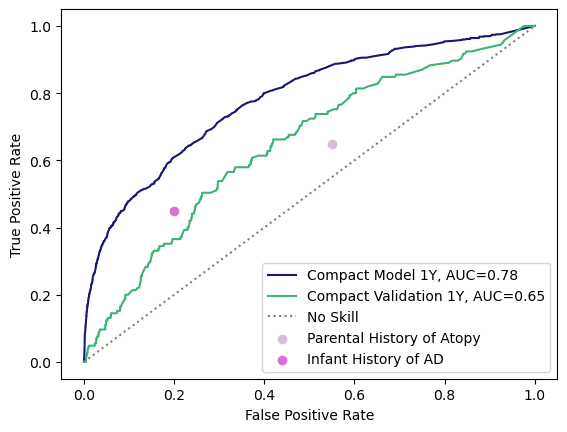

In [103]:

plt.figure(0).clf()


y_test = auc_1Yc['1yc_y_test']
y_pred_proba = auc_1Yc['1yc_y_pred']

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Compact Model 1Y, AUC=" + str(round(auc, 2)), color='midnightblue')


a_test = val_1Yc['y1c_val']
a_pred_proba = val_1Yc['y1c_pred']

fpr3, tpr3, _ = metrics.roc_curve(a_test, a_pred_proba)
auc3 = metrics.roc_auc_score(a_test, a_pred_proba)
plt.plot(fpr3, tpr3, label="Compact Validation 1Y, AUC=" + str(round(auc3, 2)), color='mediumseagreen')



plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label="No Skill")
plt.scatter(0.55, 0.65, color='thistle', label='Parental History of Atopy')
plt.scatter(0.2, 0.45, color='orchid', label='Infant History of AD')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)

plt.show()


In [15]:
# 6y validation
X = df_pred[feature_cols] 
y = df_pred['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[833 228]
 [ 37  37]]
Accuracy: 0.7665198237885462
Precision: 0.13962264150943396
Recall: 0.5
roc_auc_score: 0.7177318694755075


In [16]:
y_pred = meta.predict(X)
auc_6yc_val = pd.DataFrame(np.column_stack([y_pred,y]), columns=['y6c_pred', 'y6c_val'])
auc_6yc_val

,y6c_pred,y6c_val
0,0.478689,0.0
1,0.080337,1.0
2,0.110951,0.0
3,0.118955,0.0
4,0.764387,0.0
...,...,...
1130,0.130307,0.0
1131,0.063979,0.0
1132,0.118955,0.0
1133,0.127753,0.0


In [17]:
auc_6Yc = pd.read_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\auc\\auc_6c.csv")

In [18]:
auc_6Yc

,Unnamed: 0,6c_y_pred,6c_y_test
0,0,0.022222,0.0
1,1,0.000000,0.0
2,2,0.019584,0.0
3,3,0.162551,0.0
4,4,0.015362,0.0
...,...,...,...
21805,21805,0.018523,0.0
21806,21806,0.036572,0.0
21807,21807,0.011236,0.0
21808,21808,0.058406,0.0


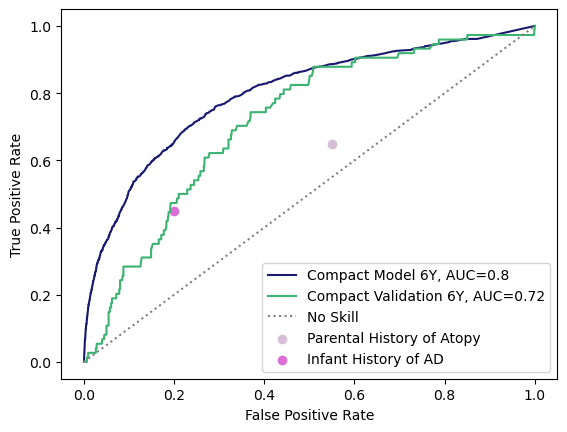

In [22]:
plt.figure(0).clf()


y_test = auc_6Yc['6c_y_test']
y_pred_proba = auc_6Yc['6c_y_pred']

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Compact Model 6Y, AUC=" + str(round(auc, 2)), color='midnightblue')


a_test = auc_6yc_val['y6c_val']
a_pred_proba = auc_6yc_val['y6c_pred']

fpr3, tpr3, _ = metrics.roc_curve(a_test, a_pred_proba)
auc3 = metrics.roc_auc_score(a_test, a_pred_proba)
plt.plot(fpr3, tpr3, label="Compact Validation 6Y, AUC=" + str(round(auc3, 2)), color='mediumseagreen')



plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label="No Skill")
plt.scatter(0.55, 0.65, color='thistle', label='Parental History of Atopy')
plt.scatter(0.2, 0.45, color='orchid', label='Infant History of AD')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)

plt.show()